<a href="https://colab.research.google.com/github/0xJCarlos/DataAnalytics-Class/blob/main/Actividad20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Actividad 20 Analítica de Datos 2024-A
###Limpieza de Datos
####Juan Carlos Solórzano Castanedo
*   Correo electrónico: juan.scastanedo@alumnos.udg.mx
*  Código de alumno: 220277645
*   Fecha: 23 de Abril del 2024





###Contenido


1.   Planteamiento del problema (qué hacer)
2.   Planteamiento de la solución (cómo se hizo)
3.   Ejemplo de ejecución (código)
4.   Conclusiones
5.   Referencias



##1. Planteamiento del problema 1 sales_record.csv

####El dataset "sales_record.csv" se procede a cargar, se inspecciona, se limpia, se guarda un set de datos nuevos, se cargan los datos nuevos y se grafican con seaborn

##2. Planteamiento de la solución

####Solución:
Se revisan los contenidos del dataset usando df.head y su estructura con df.info(), df.describe(), revisamos los tipos de datos con df.dtypes() y revisamos la cantidad de datos nulos con df.insull().sum()

Posteriormente convertimos los datos que contienen fechas al tipo de dato correcto con pd.to_datetime()

Después guardamos el dataset con los tipos de datos corregidos en un nuevo archivo, para después volver a abrirlo y visualizarlo con una gráfica de Seaborn

##Carga del Dataset

In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales_record.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,01/11/14,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,07/05/10,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,09/12/11,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


##Inspección Inicial

In [16]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          5000 non-null   object 
 1   Country         5000 non-null   object 
 2   Item Type       5000 non-null   object 
 3   Sales Channel   5000 non-null   object 
 4   Order Priority  5000 non-null   object 
 5   Order Date      5000 non-null   object 
 6   Order ID        5000 non-null   int64  
 7   Ship Date       5000 non-null   object 
 8   Units Sold      5000 non-null   int64  
 9   Unit Price      5000 non-null   float64
 10  Unit Cost       5000 non-null   float64
 11  Total Revenue   5000 non-null   float64
 12  Total Cost      5000 non-null   float64
 13  Total Profit    5000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB


Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

##Limpieza de Datos

In [17]:
#Convertir las columnas de fecha
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

#Verificacicón de la conversión
df.dtypes

<ipython-input-17-7e42553c1b10>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

##Guardado del Dataset Limpio

In [18]:
#Guardar el dataframe limpio en un nuevo archivo .CSV
df.to_csv('sales_record_cleaned.csv', index=False)

##Carga el nuevo dataset que se limpió

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Carga del dataset limpio
df = pd.read_csv('sales_record_cleaned.csv')

##Visualizamos los datos

<ipython-input-20-d096a6f3fcfb>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total Profit', y='Region', data=df, estimator=sum, ci=None, color='lightblue')


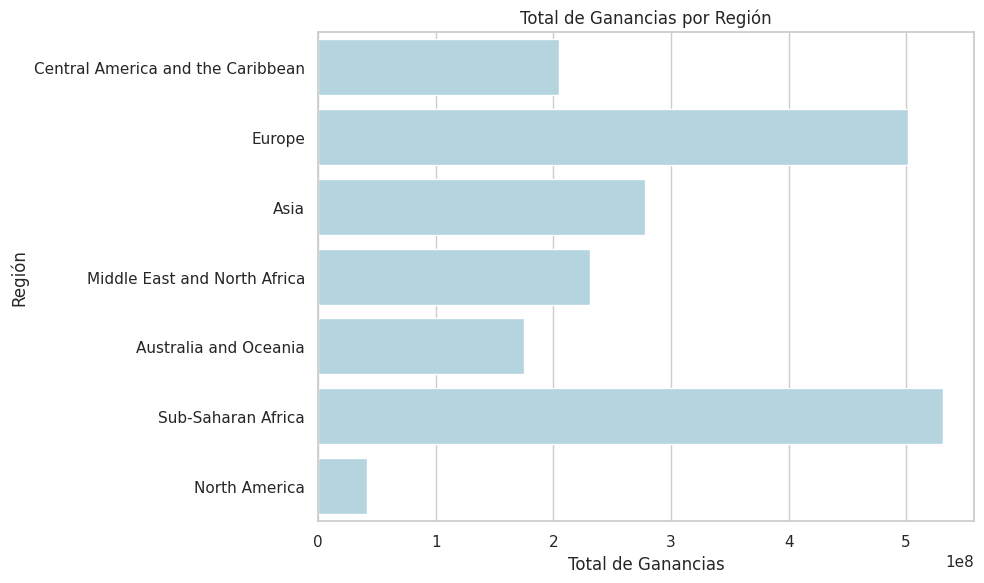

In [20]:
#Configuración del estilo de los gráficos
sns.set(style="whitegrid")

#Creación de un gráfico de barras para visualizar el total de ganancias por región
plt.figure(figsize=(10,6))
sns.barplot(x='Total Profit', y='Region', data=df, estimator=sum, ci=None, color='lightblue')
plt.title('Total de Ganancias por Región')
plt.xlabel('Total de Ganancias')
plt.ylabel('Región')
plt.tight_layout()
plt.show()